## Homework 3: Finishing Graphics and Advanced Visualization
#### Jake Roush
#### GLG 803

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("S:/Users/roushjac/Misc/Class/GLG 803/Spring-2018/Homework/Homework_1/Roush_HW1/gauge_data.csv")

### Set parameters and show pressure boxplot in matplotlib

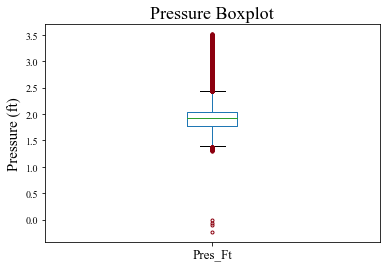

In [7]:
# Personal figure parameters:
mpl.rc('xtick', labelsize=13) 
mpl.rc('ytick', labelsize=10)
# Boxplot specific parameters
mpl.rcParams['font.family'] = 'times new roman'
mpl.rcParams['font.weight'] = '400'
mpl.rcParams['font.size'] = '15'
mpl.rcParams['boxplot.flierprops.markersize'] = '3'
mpl.rcParams['boxplot.flierprops.marker'] = 'o'
mpl.rcParams['boxplot.flierprops.markeredgecolor'] = 'xkcd:crimson'


# Pressure boxplot
tempFig = data.boxplot(column='Pres_Ft', grid=False)
tempFig.set_title('Pressure Boxplot')
tempFig.set_ylabel('Pressure (ft)')


### Now making the boxplot with seaborn

[<matplotlib.text.Text at 0x11910390>, <matplotlib.text.Text at 0x117f8f98>]

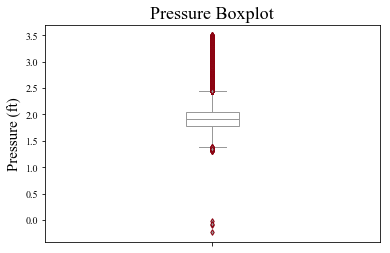

In [6]:
#mpl.rcParams['boxplot.flierprops.markeredgecolor'] = 'xkcd:crimson'
flierprops = dict(markeredgecolor='xkcd:crimson', markersize=4,
              linestyle='none')
sns.boxplot(x='Pres_Ft', data=data, orient='v', color='white',
           fliersize=5, linewidth=1.0, width=0.16,
           flierprops=flierprops).set(
            ylabel='Pressure (ft)',
            title='Pressure Boxplot')

### Now with histograms! First with matplotlib

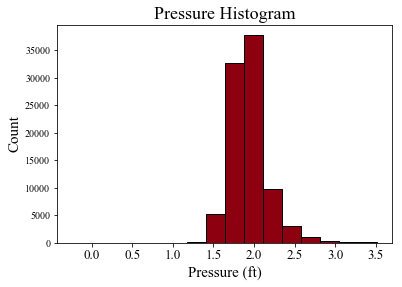

In [24]:
presHist = data.hist(column='Pres_Ft', grid=False, color='xkcd:crimson', bins=16, edgecolor='black')
plt.title('Pressure Histogram')
plt.ylabel('Count')
plt.xlabel('Pressure (ft)')
plt.locator_params(axis='x', nbins=10)

### Now a histogram with seaborn

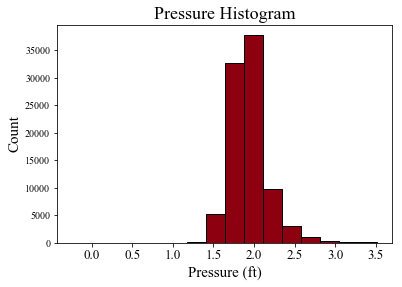

In [43]:
sns.distplot(a=data['Pres_Ft'], hist=True, kde=False, bins=16, color='xkcd:crimson',
            hist_kws=dict(edgecolor='k', alpha=1))
plt.title('Pressure Histogram')
plt.ylabel('Count')
plt.xlabel('Pressure (ft)')
plt.locator_params(axis='x', nbins=10)

### Timeseries with matplotlib

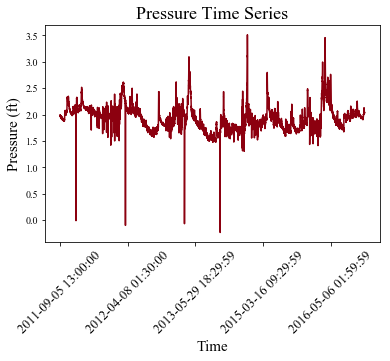

In [46]:
data.plot.line(x='Date_Time', y='Pres_Ft', color='xkcd:crimson',
              rot=45, legend=False)
plt.title('Pressure Time Series')
plt.ylabel('Pressure (ft)')
plt.xlabel('Time')


### Timeseries with seaborn

ValueError: negative dimensions are not allowed

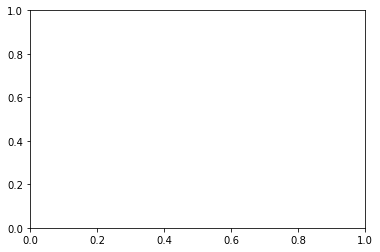

In [5]:
# Converting to datetime
data['Date_Time'] = pd.to_datetime(data['Date_Time'])

sns.tsplot(data=data, time='Date_Time', value='Pres_Ft')

tsplot() is not working - Bailey and I cannot figure it out. Don't have any idea what the error is telling me, I don't have any negative dimensions. If only seaborn supported a regular line plot...

### Scatter plot with matplotlib

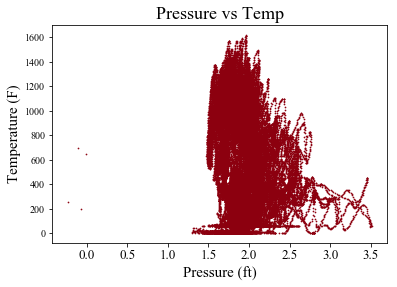

In [16]:
data.plot.scatter(x='Pres_Ft', y='Temp_F', s=0.5, color='xkcd:crimson')
plt.title('Pressure vs Temp')
plt.ylabel('Temperature (F)')
plt.xlabel('Pressure (ft)')
plt.locator_params(axis='x', nbins=10)

### Scatter plot with seaborn

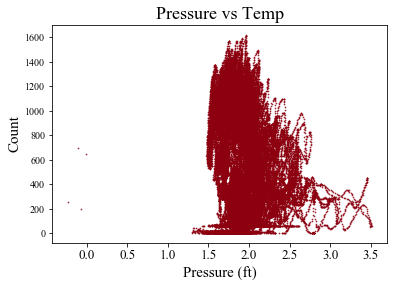

In [15]:
sns.regplot(x='Pres_Ft', y='Temp_F', data=data, fit_reg=False, color='xkcd:crimson',
           scatter_kws=dict(s=0.5))
plt.title('Pressure vs Temp')
plt.ylabel('Count')
plt.xlabel('Pressure (ft)')
plt.locator_params(axis='x', nbins=10)

#### Reflections

Matplotlib seems to be easier to work with, since it's integrated with pandas and you can call methods directly on dataframes. It's often difficult to modify parameters directly through seaborn without calling on matplotlib - but thankfully most matplotlib parameters still apply to Seaborn quite well since Seaborn is built on top of matplotlib. 

I don't really like the default settings for seaborn. They're ugly but thankfully easy to change with the power of matplotlib's .rcParams method. 